In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [16]:

ticker = 'TCS.NS'
df = yf.download(ticker, start='2015-01-01', end='2024-12-31')
df = df[['Close']]
df.dropna(inplace=True)
df.head()


/tmp/ipython-input-16-1679279421.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2015-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,TCS.NS
Date,
2015-01-01,1084.866699
2015-01-02,1099.314087
2015-01-05,1082.608032
2015-01-06,1042.696411
2015-01-07,1030.379883


In [17]:
scaler = MinMaxScaler()
df['Scaled_Close'] = scaler.fit_transform(df[['Close']])

df['Target'] = df['Scaled_Close'].shift(-1)
df.dropna(inplace=True)

X = df[['Scaled_Close']].values
y = df['Target'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [18]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [19]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [21]:
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_lr_unscaled = scaler.inverse_transform(y_pred_lr.reshape(-1, 1))
y_pred_rf_unscaled = scaler.inverse_transform(y_pred_rf.reshape(-1, 1))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test_unscaled, y_pred_lr_unscaled)))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test_unscaled, y_pred_rf_unscaled)))
print("Linear Regression R² Score:", r2_score(y_test_unscaled, y_pred_lr_unscaled))
print("Random Forest R² Score:", r2_score(y_test_unscaled, y_pred_rf_unscaled))

Linear Regression RMSE: 45.89487319416893
Random Forest RMSE: 253.37514506024561
Linear Regression R² Score: 0.9881299986292419
Random Forest R² Score: 0.6382150960485875


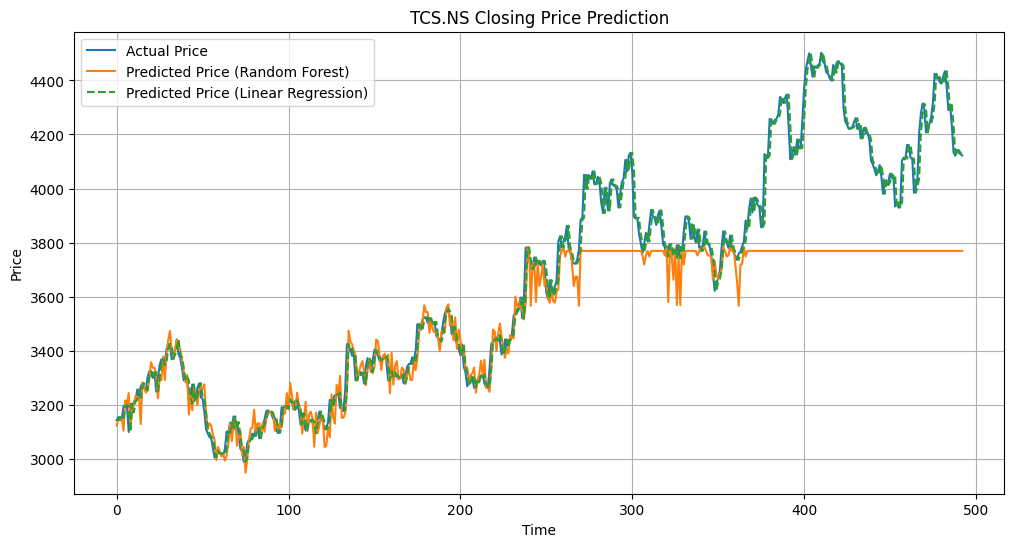

In [22]:

plt.figure(figsize=(12,6))
plt.plot(y_test_unscaled, label='Actual Price')
plt.plot(y_pred_rf_unscaled, label='Predicted Price (Random Forest)')
plt.plot(y_pred_lr_unscaled, label='Predicted Price (Linear Regression)', linestyle='--')
plt.title(f"{ticker} Closing Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()
